# Q1 State of CRE & Industry Outlook
## Professor Timothy H. Savage, Ph.D. CRE
### NYU Schack Institute of Real Estate and Faculty Director of the CREFC Center for Real Estate Finance
### February 23, 2022

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01').dropna()
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01').dropna()

cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

### Setting the Stage: Three Important Empirical Regularities

Text(0, 0.5, '%')

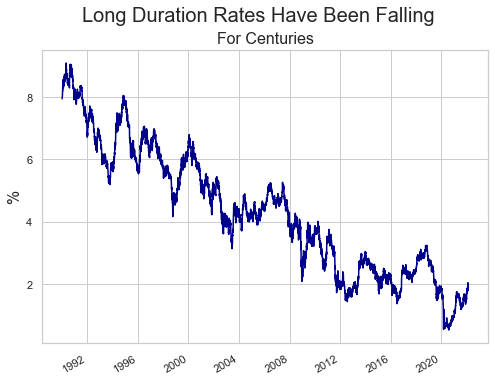

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('For Centuries', fontsize=16)
plt.ylabel('%', fontsize=16)




Text(0, 0.5, '%')

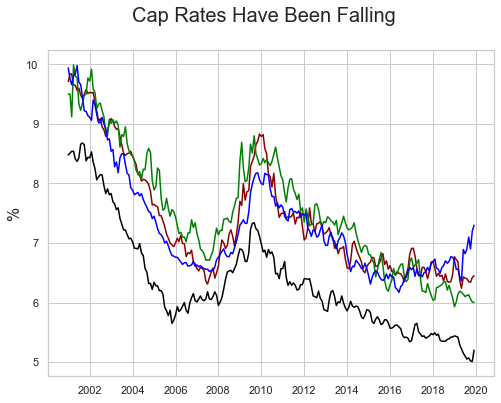

In [4]:
plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rates Have Been Falling", fontsize=20)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

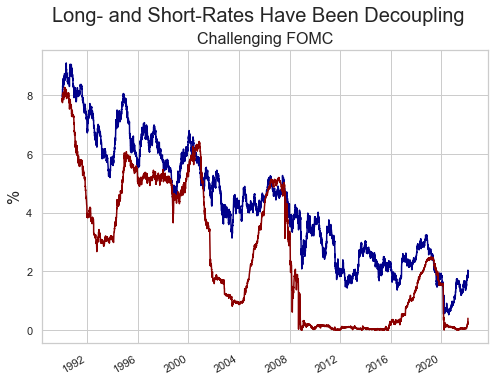

In [5]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Been Decoupling', fontsize=20)
plt.title('Challenging FOMC', fontsize=16)
plt.ylabel('%', fontsize=16)



### Why This Matters for CRE

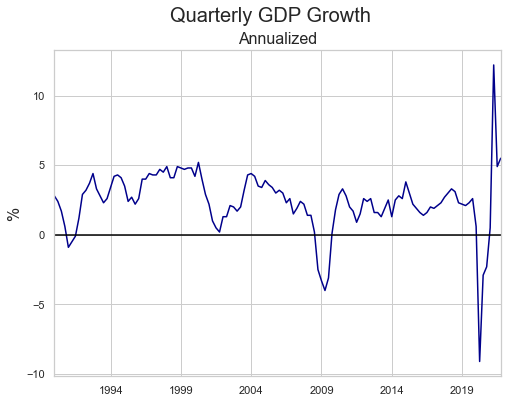

In [6]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='1990-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Quarterly GDP Growth', fontsize=20)
plt.title('Annualized', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')


Text(0, 0.5, 'Weekly Claims (Millions)')

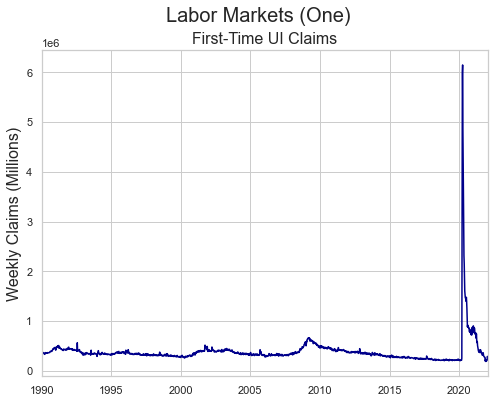

In [7]:
claims = fred.get_series("ICSA", observation_start='1990-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Labor Markets (One)', fontsize=20)
plt.title('First-Time UI Claims', fontsize=16)
plt.ylabel('Weekly Claims (Millions)', fontsize=16)



Text(0, 0.5, 'Monthly Quits (Thousands)')

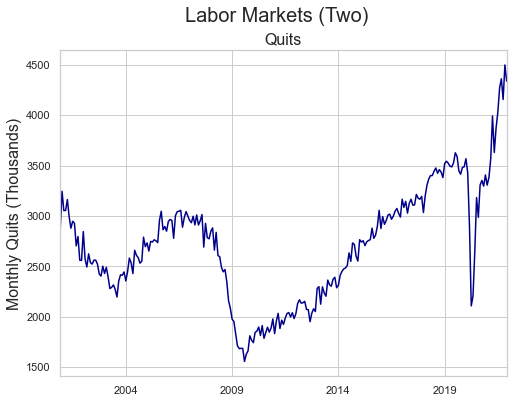

In [8]:
unemp_rate = fred.get_series("JTSQUL", observation_start='1980-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Labor Markets (Two)', fontsize=20)
plt.title('Quits', fontsize=16)
plt.ylabel('Monthly Quits (Thousands)', fontsize=16)



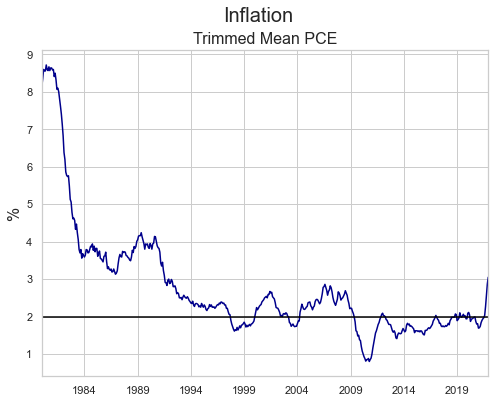

In [9]:
inflation = fred.get_series("PCETRIM12M159SFRBDAL", observation_start='1980-01-01')
inflation.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Inflation', fontsize=20)
plt.title('Trimmed Mean PCE', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2.0, color="black")


Text(0, 0.5, 'Trillions $')

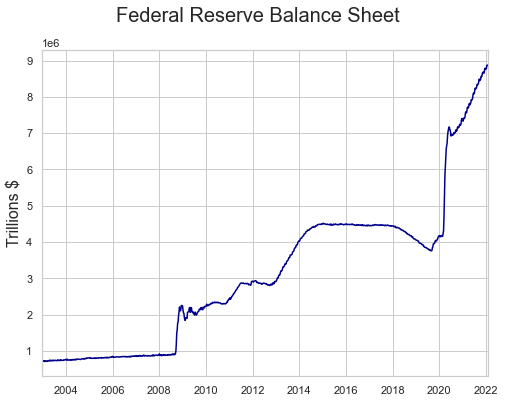

In [10]:
balance_sheet = fred.get_series("WALCL", observation_start='1990-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Balance Sheet', fontsize=20)
plt.ylabel('Trillions $', fontsize=16)




Text(0, 0.5, '')

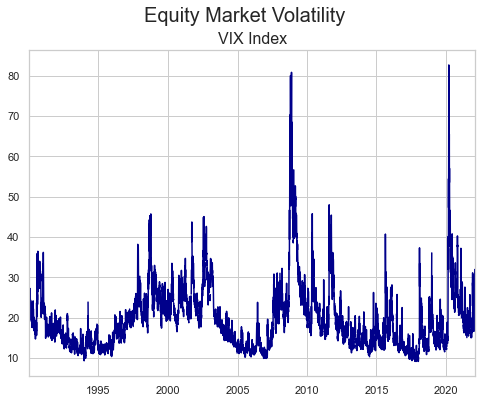

In [11]:
wilshire = fred.get_series("VIXCLS", observation_start='1990-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Equity Market Volatility', fontsize=20)
plt.title('VIX Index', fontsize=16)
plt.ylabel('', fontsize=16)



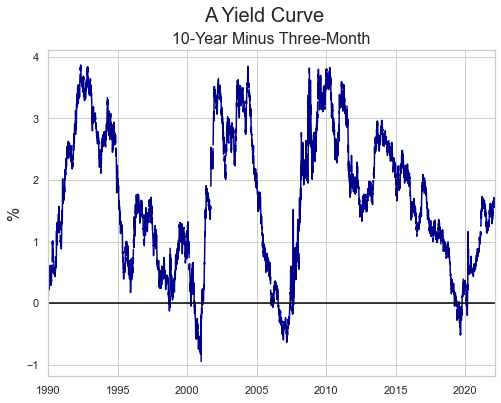

In [12]:
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('A Yield Curve', fontsize=20)
plt.title('10-Year Minus Three-Month', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')


In [13]:
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccination = vaccination[vaccination['location'] == 'United States'].dropna()
vaccination['date'].astype(str)
vaccination['Date'] = pd.to_datetime(vaccination['date'], format='%Y-%m-%d')
vaccination = vaccination.set_index('Date')
vaccination['booster_count'] = vaccination['total_boosters'] - vaccination['total_boosters'].shift(periods=1, freq="D")

Text(0, 0.5, 'Tens of Millions')

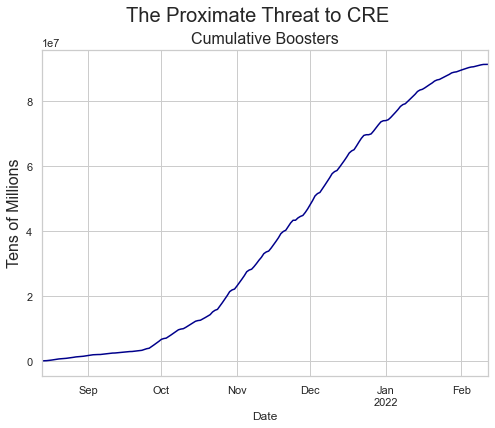

In [14]:
vaccination['total_boosters'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Proximate Threat to CRE', fontsize=20)
plt.title('Cumulative Boosters', fontsize=16)
plt.ylabel('Tens of Millions', fontsize=16)


